In [100]:
import graphlab as gl

2016-04-19 18:56:30,980 [WARNING] graphlab.product_key, 191: Unable to write current GraphLab Create license to /home/johnny/.graphlab/config. Ensure that this user account                         has write permission to /home/johnny/.graphlab/config to save the license for offline use.


This non-commercial license of GraphLab Create is assigned to johnnysand7@gmail.com and will expire on March 17, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-04-19 18:56:31,224 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: /tmp/graphlab_server_1461117389.log
2016-04-19 18:56:31,243 [WARNING] graphlab.deploy._session, 116: Unable to create session in specified location: '/home/johnny/.graphlab/artifacts'. Using: '/var/tmp/graphlab-johnny/19533/tmp_session_c117e91f-5e39-41d6-80a5-3b0f928f4f89'


In [2]:
import requests
from bs4 import BeautifulSoup
import pymongo 
from collections import Counter
import pandas as pd
import numpy as np
import re, time

In [ ]:
url = "store.steampowered.com/app/730"

In [36]:
class ScrapeGameInfo(object):
    
    def __init__(self, appids):
        
        self.appids = appids
        self.db = None
        self.app = None
    
    
    def mongodb_connection(self):
        """
        Connect to MongoDB 'steam'
        """
        client = pymongo.MongoClient()
        self.db = client.steam
    
    
    def insert_document(self, dct):
        """
        Insert a player dictionary document in db_name of MongoDB
        """
        self.db.games2.insert_one(dct)
    
    
    def scrape_store(self):
        cookies = {"birthtime" : "226815406"}

        for app in self.appids:
            game_info_dict = {}
            self.app = app
            url = "https://store.steampowered.com/app/" + str(app)
            try:

                response = requests.get(url, cookies=cookies)
                soup = BeautifulSoup(response.text, "html.parser")
                reviews = soup.find_all("div", "block responsive_apppage_reviewblock")
                try:
                    release_date = re.findall(r": ([a-zA-Z0-9, ]+)\n", soup.findAll("div", "release_date")[0].text)[0]
                except IndexError:
                    release_date = re.findall(r": ([a-zA-Z0-9, ]+)\n", soup.findAll("div", "release_date")[0].text)
                try:
                    review_num = re.findall(r"([0-9]+)\/", reviews[0].text)[0]
                except IndexError:
                    reviews = ''.join(list(soup.find_all("div", "user_reviews_summary_row")[0].stripped_strings))
                    review_num = re.findall(r"([0-9]+)%", reviews)[0]
                
                
                
                review_status = soup.find_all("span", "game_review_summary")[0].text
                genre = list(soup.find_all("div", "glance_tags popular_tags")[0].stripped_strings)[:-1]
                #re.findall(r"Genre: ([a-zA-Z\w]+)", soup.find_all("div", "details_block")[0].text)[-1]
                try:
                    price = re.findall(r"[0-9\.]+", soup.find_all("div", "game_purchase_price price")[0].text)[-1]
                except IndexError:
                    price = "0"
                game_info_dict["appid"] = app
                game_info_dict["genre"] = genre
                game_info_dict["release_year"] = release_date
                game_info_dict["reviews"] = review_status
                game_info_dict["price"] = price
                self.insert_document(game_info_dict)
                
            except requests.ConnectionError:
                time.sleep(10)
                #print app
                response = requests.get(url, cookies=cookies)
                #response = re.sub(r"[\r\t\n]+", r" ", response.text)
                soup = BeautifulSoup(response.text, "html.parser")
                reviews = soup.find_all("div", "block responsive_apppage_reviewblock")
                try:
                    release_date = re.findall(r": ([a-zA-Z0-9, ]+)\n", soup.findAll("div", "release_date")[0].text)[0]
                except IndexError:
                    release_date = re.findall(r": ([a-zA-Z0-9, ]+)\n", soup.findAll("div", "release_date")[0].text)
                try:
                    review_num = re.findall(r"([0-9]+)\/", reviews[0].text)[0]
                except IndexError:
                    reviews = ''.join(list(soup.find_all("div", "user_reviews_summary_row")[0].stripped_strings))
                    review_num = re.findall(r"([0-9]+)%", reviews)[0]
                
                
                
                review_status = soup.find_all("span", "game_review_summary")[0].text
                genre = list(soup.find_all("div", "glance_tags popular_tags")[0].stripped_strings)[:-1]
                #re.findall(r"Genre: ([a-zA-Z\w]+)", soup.find_all("div", "details_block")[0].text)[-1]
                try:
                    price = re.findall(r"[0-9\.]+", soup.find_all("div", "game_purchase_price price")[0].text)[-1]
                except IndexError:
                    price = "0"
                game_info_dict["appid"] = app
                game_info_dict["genre"] = genre
                game_info_dict["release_year"] = release_date
                game_info_dict["reviews"] = review_status
                game_info_dict["price"] = price
                self.insert_document(game_info_dict)
                
            except (ValueError, IndexError):
                #print app
                continue
                

In [24]:
url = "https://store.steampowered.com/app/730" 
cookies = {"birthtime" : "226815406"}

response = requests.get(url, cookies=cookies)
#response = re.sub(r"[\r\t\n]+", r" ", response.text)
soup = BeautifulSoup(response.text, "html.parser")

release_date = re.findall(r": ([a-zA-Z0-9, ]+)\n", soup.findAll("div", "release_date")[0].text)[0]

In [26]:
review_status = soup.find_all("span", "game_review_summary")[0].text
genre = list(soup.find_all("div", "glance_tags popular_tags")[0].stripped_strings)
#re.findall(r"Genre: ([a-zA-Z\w]+)", soup.find_all("div", "details_block")[0].text)[-1]

price = re.findall(r"[0-9\.]+", soup.find_all("div", "game_purchase_price price")[0].text)[-1]

In [27]:
review_status

u'Very Positive'

In [30]:
release_date

u'Aug 21, 2012'

In [37]:
scraping = ScrapeGameInfo(game_ids)

In [38]:
scraping.mongodb_connection()

In [39]:
scraping.scrape_store()

In [ ]:
def scrape_store(self):
    cookies = {"birthtime" : "226815406"}

    for app in self.appids:
        game_info_dict = {}
        self.app = app
        url = "https://store.steampowered.com/app/" + str(app)
        try:

            response = requests.get(url, cookies=cookies)
            response = re.sub(r"[\r\t\n]+", r" ", response.text)
            soup = BeautifulSoup(response, "html.parser")
            try:
                release_date = re.findall(r": ([a-zA-Z0-9, ]+)\n", soup.findAll("div", "release_date")[0].text)[0]
            except IndexError:
                release_date = re.findall(r"[0-9]{4}", soup.findAll("div", "release_date")[0].text)[0]
            review_status = soup.find_all("span", "game_review_summary")[0].text
            genre = list(soup.find_all("div", "glance_tags popular_tags")[0].stripped_strings)
            #re.findall(r"Genre: ([a-zA-Z\w]+)", soup.find_all("div", "details_block")[0].text)[-1]
            try:
                price = re.findall(r"[0-9\.]+", soup.find_all("div", "game_purchase_price price")[0].text)[-1]
            except IndexError:
                price = "0"
            game_info_dict["appid"] = app
            game_info_dict["genre"] = genre
            game_info_dict["release_year"] = release_year
            game_info_dict["reviews"] = review_status
            game_info_dict["price"] = price


In [20]:
cookies = {"birthtime" : "226815406"}
url = "https://store.steampowered.com/app/72850"
response = requests.get(url, cookies=cookies)
soup = BeautifulSoup(response.text, "html.parser")

In [18]:
list(soup.find_all("div", "glance_tags popular_tags")[0].stripped_strings)

[u'FPS',
 u'Multiplayer',
 u'Shooter',
 u'Action',
 u'Team-Based',
 u'Competitive',
 u'Tactical',
 u'First-Person',
 u'e-sports',
 u'PvP',
 u'Online Co-Op',
 u'Military',
 u'Co-op',
 u'Strategy',
 u'War',
 u'Trading',
 u'Realistic',
 u'Difficult',
 u'Fast-Paced',
 u'Moddable',
 u'+']

In [11]:
len(game_ids)

526

In [16]:
",".join(game_ids)

TypeError: sequence item 0: expected string, numpy.int64 found

In [38]:
with open("my_project/data/top_appids.csv", "wb") as f:
    f.write(",".join(game_ids))

In [21]:
re.findall(r": ([a-zA-Z0-9, ]+)\n", soup.find_all("div", "release_date")[0].text)[0]

u'Nov 10, 2011'

In [46]:
pd.read_csv("my_project/data/top_appids.csv", delimiter="," header=None)

SyntaxError: invalid syntax (<ipython-input-46-a79824992c47>, line 1)

In [54]:
pd.DataFrame(game_ids)[0].tolist()[0]

str

In [18]:
conn = pymongo.MongoClient()['steam']
cursor = conn['games'].find({},{"_id":0, "appid":1})

In [19]:
df = pd.DataFrame(list(cursor))

In [23]:
game_ids = df["appid"].astype(int).tolist()

In [10]:
df.to_csv("my_project/data/top_appids.csv")

In [34]:
game_ids = map(lambda x: str(x), game_ids)

In [48]:
",".join(game_ids)

'200710\n,71340\n,10\n,219150\n,20\n,30\n,282660\n,231430\n,215080\n,311340\n,41010\n,391220\n,57400\n,20540\n,16450\n,18500\n,70\n,22600\n,235600\n,344760\n,20570\n,102500\n,43110\n,209000\n,333930\n,41070\n,20500\n,268650\n,107200\n,268420\n,365590\n,319630\n,243870\n,24740\n,108710\n,26800\n,20510\n,209080\n,391540\n,9930\n,242720\n,221380\n,295110\n,102600\n,239820\n,110800\n,268500\n,202970\n,220\n,39140\n,380\n,223470\n,240\n,233720\n,104700\n,108800\n,10500\n,32470\n,65800\n,241930\n,209170\n,282900\n,24860\n,207140\n,109600\n,39210\n,300\n,50\n,47410\n,8500\n,49470\n,225600\n,207170\n,35140\n,377160\n,8930\n,108600\n,286160\n,57690\n,2400\n,243470\n,80\n,289130\n,49520\n,227700\n,201790\n,209270\n,4500\n,113020\n,24960\n,242050\n,203140\n,293260\n,400\n,3480\n,24980\n,334230\n,203160\n,256410\n,20900\n,237990\n,269210\n,215470\n,242760\n,10680\n,238010\n,65980\n,244160\n,104900\n,3830\n,4550\n,221640\n,42160\n,12750\n,250320\n,305620\n,420\n,211420\n,207610\n,220240\n,4580\n,20

In [471]:
to_go = all_games - set(df.appid.tolist())

In [472]:
len(to_go)

1698

In [123]:
conn = pymongo.MongoClient()['steam']
cursor = conn['games2'].find({})

In [124]:
df2 = pd.DataFrame(list(cursor))

In [125]:
del df2["_id"]

In [129]:
df2["genre_sentence"] = [" ".join(genre)[:-1] for genre in df2["genre"]]
df2["num_tags"] = [len(genres)-1 for genres in df2["genre"]]

In [132]:
df2.head()

,appid,genre,price,release_year,reviews,genre_sentence,num_tags
0,221540,"[Tower Defense, Strategy, Indie, Sci-fi, Co-op...",14.99,2014,Very Positive,Tower Defense Strategy Indie Sci-fi Co-op Spac...,11
1,287140,"[Indie, Simulation, Massively Multiplayer, Cas...",4.99,2015,Mixed,Indie Simulation Massively Multiplayer Casual ...,5
2,370920,"[Action, Indie, Music, Fast-Paced, Difficult, +]",4.99,2015,Very Positive,Action Indie Music Fast-Paced Difficult,5
3,330100,"[Early Access, Action, RPG, Indie, Simulation,...",14.99,2014,Very Positive,Early Access Action RPG Indie Simulation Space,6
4,425870,"[Early Access, Sports, Action, Indie, +]",12.99,2016,Positive,Early Access Sports Action Indie,4


In [131]:
df2["num_tags"] = [len(genres)-1 for genres in df2["genre"]]

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

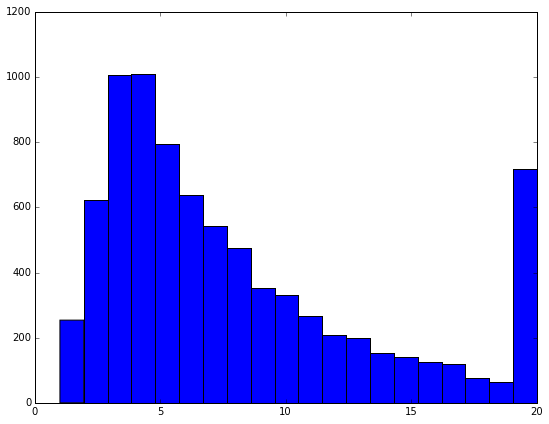

In [135]:
plt.figure(figsize=(9,7))
plt.hist(df2.num_tags, bins=20)
plt.show()

In [147]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

In [140]:
TagCounts = CountVectorizer(stop_words="english")

In [141]:
TagCounts.fit_transform(df2.genre_sentence)

<8105x346 sparse matrix of type '<type 'numpy.int64'>'
	with 75199 stored elements in Compressed Sparse Row format>

In [148]:
len(TagCounts.vocabulary_)

346

In [318]:
all_games = set(total_games.keys())

2268154062.0

In [429]:
cookies = {"birthtime" : "226815406"}
        
url = "https://store.steampowered.com/app/231060"
response = requests.get(url, cookies=cookies)
response = re.sub(r"[\r\t\n]+", r" ", response.text)
#response = re.sub(r"\<b\>", r" ", response).strip()
soup = BeautifulSoup(response, "html.parser")

In [430]:
re.findall(r"[0-9]{4}", soup.findAll("div", "release_date")[0].text)[0]

u'2013'

In [431]:
soup.find_all("span", "game_review_summary")[0].text

u'Mixed'

In [432]:
re.findall(r"Genre: ([a-zA-Z\w]+)", soup.find_all("div", "details_block")[0].text)[-1]

u'Free'

In [433]:
re.findall(r"[0-9\.]+", soup.find_all("div", "game_purchase_price price")[0].text)[-1]

IndexError: list index out of range

In [406]:
url

'https://store.steampowered.com/app/65500'

In [226]:
conn = pymongo.MongoClient()['steam']
cursor = conn['test'].find({}, {"_id":0, "game_info":1})

In [227]:
df = pd.DataFrame(list(cursor))

In [233]:
df = df[(df["game_info"] != "empty") & (df["game_info"] != "private")]

In [239]:
def game_counts(df):
    total_games = Counter({})
    for user in df["game_info"]:
        for game in user:
            game_dict = {}
            game_dict[str(game["appid"])] = game["playtime_forever"]
            total_games.update(game_dict)
    return total_games

In [242]:
total_games = game_counts(df)

In [244]:
appids = set(total_games.keys())

In [245]:
len(appids)

9822

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline

In [297]:
"8930" in appids

True

In [147]:
df = df[(df["game_info"] != "empty") & (df["game_info"] != "private")]

In [149]:
sf = gl.SFrame(df)

In [129]:
sums = 0
for user in df.game_info:
    if type(user) != list:
        sums += 1

In [144]:
for i, user in enumerate(df.game_info):
    if type(user) != list:
        print i

150
312
338
562
745


In [146]:
df.game_info[312]

u'empty'

In [139]:
df.reset_bbbindex(drop=True, inplace=True)

In [191]:
def ban_status_sf(sf):   
    new_sf = gl.SFrame()
    for i in xrange(len(sf["steamid"])):
        ban_dict = sf["ban_status"][i]
        ban_dict["steamid"] = sf["steamid"][i]
        for k, v in ban_dict.iteritems():
            ban_dict[k] = [v]
        user_sf = gl.SFrame(data=ban_dict, format="dict")
        new_sf = new_sf.append(user_sf)
    return new_sf

In [189]:
sf.head(1)

Columns:
	ban_status	dict
	friends	list
	game_info	list
	steamid	str
	user_info	dict

Rows: 1

Data:
+-------------------------------+-------------------------------+
|           ban_status          |            friends            |
+-------------------------------+-------------------------------+
| {'NumberOfGameBans': 0, 'N... | [{'steamid': '765611979605... |
+-------------------------------+-------------------------------+
+-------------------------------+-------------------+
|           game_info           |      steamid      |
+-------------------------------+-------------------+
| [{'playtime_forever': 30, ... | 76561197963057660 |
+-------------------------------+-------------------+
+-------------------------------+
|           user_info           |
+-------------------------------+
| {'timecreated': 1069996369... |
+-------------------------------+
[1 rows x 5 columns]

In [192]:
bans_sf = ban_status_sf(sf)

In [213]:
def user_info_sf(sf):   
    column_names = Counter(dict())
    #new_sf = gl.SFrame()
    for i in xrange(len(sf["steamid"])):
        user_dict = Counter(sf["user_info"][i])
        #user_dict["steamid"] = sf["steamid"][i]
        #for k, v in user_dict.iteritems():
           # user_dict[k] = [v]
        column_names.update(user_dict)
        
        
        #user_sf = gl.SFrame(data=user_dict, format="dict")
        #new_sf = new_sf.append(user_sf)
    return columns

In [215]:
test1 = Counter({})

In [221]:
test1 + Counter(sf["user_info"][11])

TypeError: cannot concatenate 'str' and 'int' objects

In [220]:
test1

Counter({'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/13/137d7d178c8b18d77780354c9ba584ae3ce84ef9_full.jpg',
         'commentpermission': 1,
         'communityvisibilitystate': 3,
         'lastlogoff': 1458949982,
         'loccountrycode': 'DE',
         'locstatecode': '06',
         'personaname': 'Der King is Back !! 63',
         'primaryclanid': '103582791429521408',
         'profilestate': 1,
         'timecreated': 1455801625})

In [ ]:
p

In [193]:
user_sf = user_info_sf(sf)

RuntimeError: Two SFrames have to have the same number of columns

In [182]:
test1 = sf["ban_status"][0]

In [185]:
test1

{'CommunityBanned': [0],
 'DaysSinceLastBan': [0],
 'EconomyBan': ['none'],
 'NumberOfGameBans': [0],
 'NumberOfVACBans': [0],
 'VACBanned': [0]}

In [184]:
for k, v in test1.iteritems():
    test1[k] = [v]

In [180]:
for k, v in test1.iteritems():
    print k, v

NumberOfGameBans 0
NumberOfVACBans 0
DaysSinceLastBan 0
EconomyBan none
VACBanned 0
CommunityBanned 0


In [186]:
gl.SFrame(data=test1, format="dict")

CommunityBanned,DaysSinceLastBan,EconomyBan,NumberOfGameBans,NumberOfVACBans,VACBanned
0,0,none,0,0,0
